
Pandas est la librairie python pour la gestion des 'DataFrame' c'est l'équivalent d'une feuille excel ou d'une table d'une base de donnée de type SQL. 

* Les lignes représentent les individus (ou observations).
* Les colonnes représentent les variables  (quantitative, qualitative ).

Commençons pas jouer un peu avec cette librairie

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
% matplotlib inline
np.set_printoptions(precision=2,linewidth=500,suppress=True)

"""pour que les dataFrame ne soient pas trop coupée dans la console"""
pd.set_option('expand_frame_repr', False)


## Commençons par Jouer

Avant de rentrer dans la technique, effectuons un travail amusant avec l'aide de `pandas`. 

In [6]:
df = pd.read_csv("data/nat2015.txt",sep="\t",encoding='latin-1')
df.head(10)

,sexe,preusuel,annais,nombre
0,1,A,1980,3.0
1,1,A,1998,3.0
2,1,A,XXXX,21.0
3,1,AADEL,1976,5.0
4,1,AADEL,1978,3.0
5,1,AADEL,1980,3.0
6,1,AADEL,1981,5.0
7,1,AADEL,1982,4.0
8,1,AADEL,1983,3.0
9,1,AADEL,1987,5.0


***A vous:*** $(1\heartsuit)$ Quelle est la signification des variables `preusuel` et `annais`?

In [7]:
tab = df.pivot_table(index="annais", columns="sexe", values="nombre", aggfunc="sum")
tab.head()


sexe,1,2
annais,,
1900,177483.0,237721.0
1901,196048.0,257593.0
1902,204440.0,261516.0
1903,207457.0,261537.0
1904,214244.0,264926.0


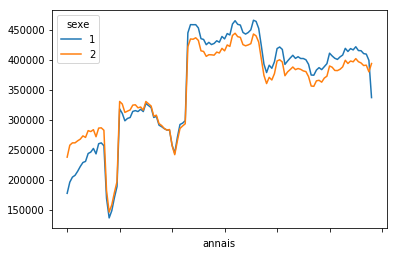

In [8]:
tab.plot();

Customisons

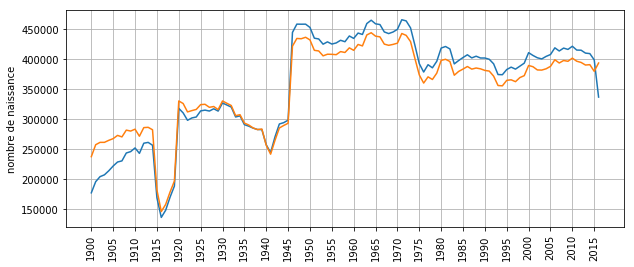

In [45]:
fig,ax=plt.subplots(figsize=(10,4))
ax.plot(tab.index,tab[1].values,label="homme")
ax.plot(tab.index,tab[2].values,label="femme")
ax.set_xticks(tab.index[0::5])
ax.set_xticklabels(tab.index[0::5],rotation="vertical")
ax.set_ylabel("nombre de naissance")
ax.grid(True)
ax.legend();

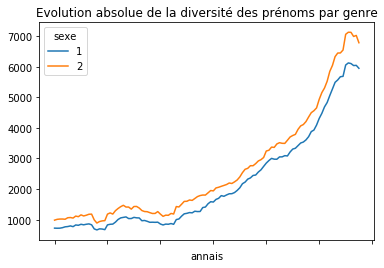

In [6]:
""" on supprime les prénoms inconnus """
df = df.loc[df["annais"] != "XXXX"]
tab = df.pivot_table(index="annais", columns="sexe", values="preusuel", aggfunc="count")
tab.plot(title="Evolution absolue de la diversité des prénoms par genre");

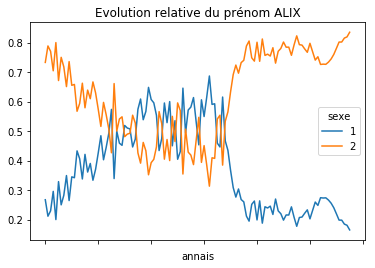

In [7]:
def evol_prenom(prenom):
    sel = df.loc[df['preusuel'] == prenom]
    evol = sel.pivot_table(index='annais',
                         columns='sexe',
                         values='nombre',
                         aggfunc='sum')
    tab = evol.div(evol.sum(axis=1), axis=0)
    tab.plot(title="Evolution relative du prénom {}".format(prenom))
    
"""  essayez par exemple avec  CLAUDE ALIX DOMINIQUE"""
evol_prenom('ALIX')

***A vous:***  Customisez $(3\heartsuit)$ tous les graphiques. Ne faites pas de copié-collé: vous devez créer une fonction qui s'applique aux 3 graphiques

## Series et Dataframe

Une série c'est une liste de valeurs indexées. On peut aussi lui donner un nom

In [30]:
s1 = pd.Series(np.random.randint(0,10,size=5), index=['a', 'b', 'c', 'd', 'e'],name="toto1")
s1

a    4
b    2
c    9
d    6
e    1
Name: toto1, dtype: int64

In [31]:
print("s1.values:\n",s1.values,type(s1.values))
print("s1.index:\n",s1.index,type(s1.index))
print("s1.index.values:\n",s1.index.values,type(s1.index.values))

s1.values:
 [4 2 9 6 1] <class 'numpy.ndarray'>
s1.index:
 Index(['a', 'b', 'c', 'd', 'e'], dtype='object') <class 'pandas.core.indexes.base.Index'>
s1.index.values:
 ['a' 'b' 'c' 'd' 'e'] <class 'numpy.ndarray'>


Une `DataFrame` c'est plusieurs `Series` collée en colonnes. Ces colonnes partagent le même index et chaque colonne a un nom. 

In [46]:
s2 = pd.Series(np.random.normal(size=5), index=['a', 'b', 'c', 'd', 'e'])
df=pd.DataFrame({"col1":s1,"col2":s2})
df

,col1,col2
a,4,-1.555250
b,2,0.184347
c,9,0.067080
d,6,-0.306240
e,1,-0.200152


In [28]:
print(df.index)
print(df.columns)

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
Index(['col1', 'col2'], dtype='object')


Quand on récupère une ligne ou une colonne d'une dataframe, on retombe sur une serie. Observez les index et les noms de ses series. Tout est logique.  

In [47]:
df['col1']

a    4
b    2
c    9
d    6
e    1
Name: col1, dtype: int64

In [48]:
df.loc['a'] # 'loc' pour extraire une ligne

col1    4.00000
col2   -1.55525
Name: a, dtype: float64

## Manipulation d'une dataframe


In [113]:
import datetime

""" créons 'df'  une dataFrame. On ne précise pas l'index, donc par défaut c'est 0,1,2,..."""
def make_df():
    df = pd.DataFrame({
        'nbPiece': [2, 3, 4, 1,4],
        'surface': [20.5, 35, None, 15,120],
        'quartier': pd.Categorical(["populaire", "populaire", "chic", "moyen","chic"]),
        'construction': [datetime.date(2012, 5, 1),datetime.date(2015, 10, 3),datetime.date(1999, 12, 21),datetime.date(2000, 1, 1),datetime.date(1969, 12, 11),],
        'prix':[60000,120000,np.nan,30000,200000],
        'nomProprio':["Toto","Momo","Fifi","Lolo",None]
    })
    return df
df= make_df()
df # mieux que print(df)

,nbPiece,surface,quartier,construction,prix,nomProprio
0,2,20.5,populaire,2012-05-01,60000.0,Toto
1,3,35.0,populaire,2015-10-03,120000.0,Momo
2,4,NaN,chic,1999-12-21,NaN,Fifi
3,1,15.0,moyen,2000-01-01,30000.0,Lolo
4,4,120.0,chic,1969-12-11,200000.0,None


`pd.Categorical`: c'est une 'enumeration':  "populaire" est codé par 0, "chic" par 1,  "moyen" par 2, cela fait gagner de l'espace mémoire.

### Sélection de lignes et colonnes

Observez à chaque fois si la sélection renvoie une `Series` ou une `DataFame`. Demandez-vous quel est l'index.  

In [128]:
"la colonne nbPiece"
df['nbPiece'] 
#ou bien avec un point: 
# oneColumn=df.nbPiece 

0    0
1    0
2    0
3    0
4    0
Name: nbPiece, dtype: int64

la méthode 'loc' permet de jouer avec les lignes et les colonnes

In [129]:
df.loc[0,:]

nbPiece                  0
surface               20.5
quartier         populaire
construction    2012-05-01
prix                 60000
nomProprio            Toto
Name: 0, dtype: object

In [130]:
df.loc[[0, 2],:]

,nbPiece,surface,quartier,construction,prix,nomProprio
0,0,20.5,populaire,2012-05-01,60000.0,Toto
2,0,NaN,chic,1999-12-21,NaN,Fifi


In [131]:
df.loc[[0,2],['nbPiece','surface']]

,nbPiece,surface
0,0,20.5
2,0,NaN


D'après vous `df.loc[[2],:]` renvoie une `Series` ou une `DataFame` $(1\heartsuit)$?

### Copy or not copy, that is the question

On rentre dans les truc bizarre (qui donne envie de dire "Grrrr").

Selectionnons deux colonnes et modifions la mini-dataframe obtenue:

In [164]:
df=make_df()
"""vérifions que pandas  fait facilement des copies des données"""
twoCol=df.loc[:, ['nbPiece', 'surface']]
twoCol['nbPiece']*=0
twoCol

,nbPiece,surface
0,0,20.5
1,0,35.0
2,0,NaN
3,0,15.0
4,0,120.0


Bonne nouvelle: la dataframe initiale n'a pas bougée: pandas a donc fait une copie des données

In [165]:
df

,nbPiece,surface,quartier,construction,prix,nomProprio
0,2,20.5,populaire,2012-05-01,60000.0,Toto
1,3,35.0,populaire,2015-10-03,120000.0,Momo
2,4,NaN,chic,1999-12-21,NaN,Fifi
3,1,15.0,moyen,2000-01-01,30000.0,Lolo
4,4,120.0,chic,1969-12-11,200000.0,None


Par contre sélectionnons une seule colonne:

In [166]:
oneCol=df.loc[:, 'nbPiece']
oneCol*=0
df

,nbPiece,surface,quartier,construction,prix,nomProprio
0,0,20.5,populaire,2012-05-01,60000.0,Toto
1,0,35.0,populaire,2015-10-03,120000.0,Momo
2,0,NaN,chic,1999-12-21,NaN,Fifi
3,0,15.0,moyen,2000-01-01,30000.0,Lolo
4,0,120.0,chic,1969-12-11,200000.0,None


Il n'y a pas eu copie. Grrrrr!!! Et pire: si on n'avait  pris deux colonnes et pas toutes les lignes, il y aurait eu copie des données! 

Signalons enfin que si on sélectionne deux colonnes sans le `loc`:

In [167]:
twoCol_bis=df[['quartier', 'nbPiece']]
twoCol_bis

,quartier,nbPiece
0,populaire,0
1,populaire,0
2,chic,0
3,moyen,0
4,chic,0


On obtient une dataFrame non-modifiable. Si on essayer de la modifier le message d'erreur est assez explicite: `A value is trying to be set on a copy of a slice from a DataFrame. Try using .loc[row_indexer,col_indexer] = value instead`

### Sélection par valeurs

In [175]:
df=make_df()
"sélection d'indices en fonction du prix"
df["prix"]<=100000

0     True
1    False
2    False
3     True
4    False
Name: prix, dtype: bool

In [174]:
"voyons les valeurs correspondantes"
df["prix"][df.prix<=100000]=0
df["prix"]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0         0.0
1    120000.0
2         NaN
3         0.0
4    200000.0
Name: prix, dtype: float64

In [172]:
"voyons la sous partie de la dataFrame correspondante"
df.loc[df["prix"]<=100000]

,nbPiece,surface,quartier,construction,prix,nomProprio
0,2,20.5,populaire,2012-05-01,60000.0,Toto
3,1,15.0,moyen,2000-01-01,30000.0,Lolo


In [173]:
df.loc[df["prix"]<=100000]=
df

ValueError: Cannot setitem on a Categorical with a new category, set the categories first

### transformation de variable

In [136]:
"""ajoutons la variable 'prix au metre carré' """
df['prixAuM2']=np.round(df.prix/df.surface) # et on voit que pandas et numpy interagissent
df

,nbPiece,surface,quartier,construction,prix,nomProprio,prixAuM2
0,2,20.5,populaire,2012-05-01,60000.0,Toto,2927.0
1,3,35.0,populaire,2015-10-03,120000.0,Momo,3429.0
2,4,NaN,chic,1999-12-21,NaN,Fifi,NaN
3,1,15.0,moyen,2000-01-01,30000.0,Lolo,2000.0
4,4,120.0,chic,1969-12-11,200000.0,None,1667.0


In [22]:
"""ajoutons une variable donnant un prix déprécié en fonction du nombre d'année et de la surface.
Comme c'est une opération plus complexe, on utilise une fonction qui agit sur une ligne"""

def priceDepreciatedFunction(line):
    dateNow = datetime.date(2016, 10, 17)
    buildDate=line['construction']
    nbDays=(dateNow - buildDate).days
    return line['prix'] - 0.5 * line['surface'] * nbDays

""" Attention :
axis=1 -> on applique la fonction ligne par ligne
axis=0 -> on applique la fonction colonne par colonne
"""
df["priceDepreciated"]=df.apply(priceDepreciatedFunction,axis=1)
df

,nbPiece,surface,quartier,construction,prix,nomProprio,prixAuM2,priceDepreciated
0,2,20.5,populaire,2012-05-01,60000.0,Toto,2927.0,43292.5
1,3,35.0,populaire,2015-10-03,120000.0,Momo,3429.0,113350.0
2,4,NaN,chic,1999-12-21,NaN,Fifi,NaN,NaN
3,1,15.0,moyen,2000-01-01,30000.0,Lolo,2000.0,-16005.0
4,4,120.0,chic,1969-12-11,200000.0,None,1667.0,-826720.0


In [24]:
"""transformons les prix pour qu'ils apparaissent en millier d'euro"""
df["prix"] /= 1000
df["priceDepreciated"]/=1000
df

,nbPiece,surface,quartier,construction,prix,nomProprio,prixAuM2,priceDepreciated
0,2,20.5,populaire,2012-05-01,0.06,Toto,2927.0,43.2925
1,3,35.0,populaire,2015-10-03,0.12,Momo,3429.0,113.3500
2,4,NaN,chic,1999-12-21,NaN,Fifi,NaN,NaN
3,1,15.0,moyen,2000-01-01,0.03,Lolo,2000.0,-16.0050
4,4,120.0,chic,1969-12-11,0.20,None,1667.0,-826.7200


### Valeurs manquantes

In [25]:
"nombre de Nan par ligne"
df.apply(lambda line:sum(line.isnull()),axis=1)

0    0
1    0
2    4
3    0
4    1
dtype: int64

In [27]:
""" le mot clef lambda sert à définir une fonction sur une ligne sans lui donner de nom. On aurait aussi pu faire:"""
def fonctionAnonyme(line):
    return sum(line.isnull())

df.apply(fonctionAnonyme,axis=1)

0    0
1    0
2    4
3    0
4    1
dtype: int64

In [28]:
"nombre de Nan par colonne"
df.apply(lambda col: sum(col.isnull()), axis=0)

nbPiece             0
surface             1
quartier            0
construction        0
prix                1
nomProprio          1
prixAuM2            1
priceDepreciated    1
dtype: int64

In [29]:
"""on remplace les surfaces manquantes par la surface moyenne du quartier correspondant"""
def surfaceNullToMeanOfQuartier(line):
    if pd.isnull(line['surface']) : return df.surface[df.quartier==line.quartier].mean() #la méthode mean ne prend pas en compte les Nan
    else : return line['surface']

df['surface']=df.apply(surfaceNullToMeanOfQuartier,axis=1)


"""on remplace les prix manquants par la surface * le prix moyen par quartier  """
def prixNullReplacement(line):
    if pd.isnull(line.prix):
        findQuartier=df.quartier==line.quartier
        mean=(df.prix[findQuartier]/df.surface[findQuartier]).mean()
        return mean* line.surface
    else : return line.prix

df.prix=df.apply(prixNullReplacement,axis=1)
"""et voilà le travail"""
df

,nbPiece,surface,quartier,construction,prix,nomProprio,prixAuM2,priceDepreciated
0,2,20.5,populaire,2012-05-01,0.06,Toto,2927.0,43.2925
1,3,35.0,populaire,2015-10-03,0.12,Momo,3429.0,113.3500
2,4,120.0,chic,1999-12-21,0.20,Fifi,NaN,NaN
3,1,15.0,moyen,2000-01-01,0.03,Lolo,2000.0,-16.0050
4,4,120.0,chic,1969-12-11,0.20,None,1667.0,-826.7200


## Uniquement le contenu

In [30]:
"""effectuons une double boucle sur la dataFrame. Notez encore la di-symétrie entre ligne et colonnes"""
for col in df.columns.values:
    for lin in df.index:
        print(col,lin,df.loc[lin,col])

nbPiece 0 2
nbPiece 1 3
nbPiece 2 4
nbPiece 3 1
nbPiece 4 4
surface 0 20.5
surface 1 35.0
surface 2 120.0
surface 3 15.0
surface 4 120.0
quartier 0 populaire
quartier 1 populaire
quartier 2 chic
quartier 3 moyen
quartier 4 chic
construction 0 2012-05-01
construction 1 2015-10-03
construction 2 1999-12-21
construction 3 2000-01-01
construction 4 1969-12-11
prix 0 0.06
prix 1 0.12
prix 2 0.2
prix 3 0.03
prix 4 0.2
nomProprio 0 Toto
nomProprio 1 Momo
nomProprio 2 Fifi
nomProprio 3 Lolo
nomProprio 4 None
prixAuM2 0 2927.0
prixAuM2 1 3429.0
prixAuM2 2 nan
prixAuM2 3 2000.0
prixAuM2 4 1667.0
priceDepreciated 0 43.2925
priceDepreciated 1 113.35
priceDepreciated 2 nan
priceDepreciated 3 -16.005
priceDepreciated 4 -826.72


In [31]:
""" Maintenant, nous transformons une partie de notre dataFrame en un brave tableau numpy numérique :
 on supprimer l'index, le nom des colonnes et l'on transforme les noms de catégories en numéro"""

df2=df.loc[:,["prix","nbPiece","surface","quartier"]]
#attention, pour ne pas avoir de bug plus loin, ne pas faire :
#df2=df[["prix","nbPiece","surface","quartier"]]
df2

,prix,nbPiece,surface,quartier
0,0.06,2,20.5,populaire
1,0.12,3,35.0,populaire
2,0.20,4,120.0,chic
3,0.03,1,15.0,moyen
4,0.20,4,120.0,chic


In [32]:
""" transformons une variable qualitative en un indice la représentant.   """
df2["quartier"]=df2["quartier"].map({"populaire":0, "chic":2, "moyen":1})
df2

,prix,nbPiece,surface,quartier
0,0.06,2,20.5,0
1,0.12,3,35.0,0
2,0.20,4,120.0,2
3,0.03,1,15.0,1
4,0.20,4,120.0,2


In [34]:
""" transformons notre dataFrame en une simple matrice numpy  """
mat=df2.values
print(type(mat))
print(mat)

<class 'numpy.ndarray'>
[[  0.06   2.    20.5    0.  ]
 [  0.12   3.    35.     0.  ]
 [  0.2    4.   120.     2.  ]
 [  0.03   1.    15.     1.  ]
 [  0.2    4.   120.     2.  ]]


une fois que l'on aura supprimer les nan, on pourra utiliser 
cette matrice pour faire une regression linéaire par exemple (ils faudra faire quelque chose pour traiter la variable qualitative).

Pour faire du traitement de donnée, la technique de travail que je conseille est la suivante :

* 1/ Effectuer tout le nettoyage des données (remplacement des nan), les statistiques descriptives, la transformation de certaines variable 
(ex: passage au log) avec pandas et ses dataFrame.
* 2/ Effectuer les taches d'apprentissages statistique à partir de tableau numpy; en utilisant sklearn, statmodel ou bien vos propres outils. 

On peut faire manger aux outils d'apprentissages statistiques  des dataFrame pandas mais c'est dangereux ; 
par exemple, si on ne prend pas garde, on risque de considérer l'index comme une variable explicative! 